# Deep Learning with TensorFlow/Keras

This notebook demonstrates basic deep learning concepts using TensorFlow and Keras.

## Sections:
1. Neural Network Basics
2. Building a Simple Neural Network
3. Training and Evaluation
4. Visualization of Results

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print("Libraries imported successfully!")

TensorFlow version: 2.20.0
Keras version: 3.12.0
Libraries imported successfully!


## 1. Load and Explore the MNIST Dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Unique labels: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


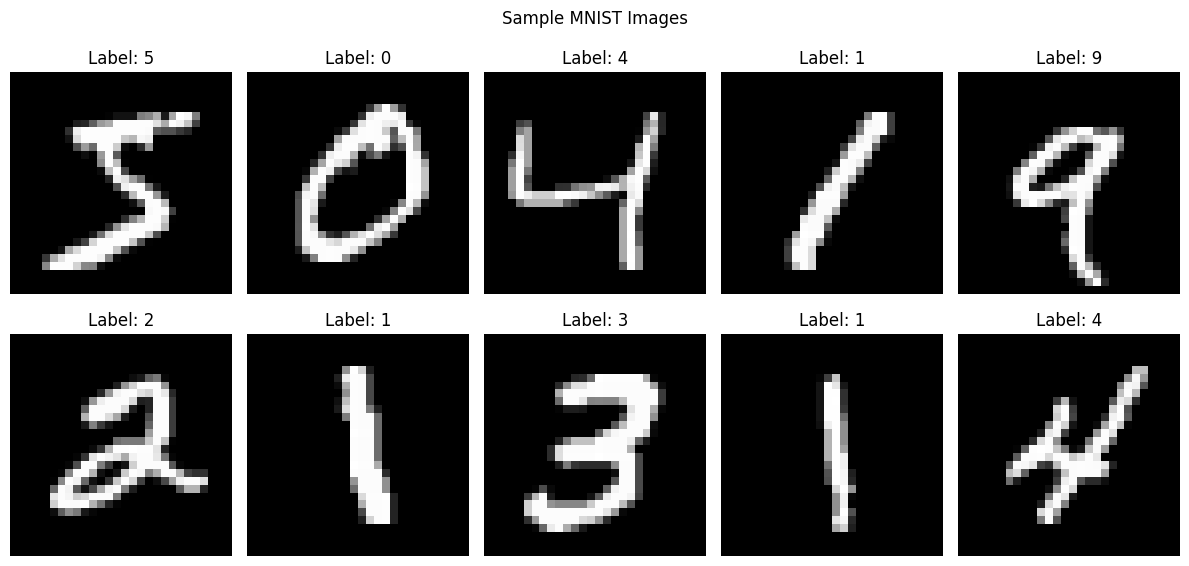

In [3]:
# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for neural network (flatten 28x28 to 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Categorical labels shape: {y_train_cat.shape}")
print(f"Sample one-hot encoded label: {y_train_cat[0]}")

## 3. Build a Simple Neural Network

In [ ]:
# Create a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

## 4. Train the Model

In [ ]:
# Train the model
history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)

print("Training completed!")

## 5. Evaluate the Model

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(x_test_flat)
predicted_classes = np.argmax(predictions, axis=1)

print(f"Predictions shape: {predictions.shape}")
print(f"Sample prediction probabilities: {predictions[0]}")
print(f"Predicted class: {predicted_classes[0]}, True class: {y_test[0]}")

## 6. Visualize Training History

In [ ]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training & validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 7. Visualize Predictions

In [ ]:
# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(10):
    ax = axes[i//5, i%5]
    
    # Show the image
    ax.imshow(x_test[i], cmap='gray')
    
    # Get prediction confidence
    prediction_confidence = np.max(predictions[i])
    
    # Set title with true and predicted labels
    title = f'True: {y_test[i]}, Pred: {predicted_classes[i]}\nConf: {prediction_confidence:.3f}'
    color = 'green' if y_test[i] == predicted_classes[i] else 'red'
    ax.set_title(title, color=color)
    ax.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
plt.tight_layout()
plt.show()

## 8. Confusion Matrix

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

## Summary

This notebook demonstrated:
- Loading and preprocessing image data (MNIST)
- Building a simple feedforward neural network with Keras
- Training the model with validation
- Evaluating model performance
- Visualizing training progress and predictions
- Creating confusion matrices for detailed analysis

Key deep learning concepts covered:
- Dense (fully connected) layers
- Activation functions (ReLU, Softmax)
- Dropout for regularization
- Loss functions and optimizers
- Training with batches and epochs
- Validation and overfitting monitoring